In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
num = np.random.rand(100000000)
print(num)
# Time it takes to execute without numpy
start_time = time.time()
add = sum(num)
print("Time taken without numpy: ", time.time() - start_time)
# Time it takes to execute with numpy
start_time = time.time()
add = np.sum(num)
print("Time taken with numpy: ", time.time() - start_time)

[0.78509883 0.94502378 0.21313482 ... 0.26607416 0.04660762 0.48796845]
Time taken without numpy:  8.003445625305176
Time taken with numpy:  0.1661207675933838


In [3]:
# Generate a matrix of (10000, 10000)
matrix = np.random.rand(10000, 10000)
print(matrix)
# Transpose the matrix
matrix = np.transpose(matrix)
print(matrix)

[[0.21535631 0.77057357 0.5251877  ... 0.24807412 0.79583758 0.05041645]
 [0.24862701 0.81690741 0.17481285 ... 0.3408246  0.8550199  0.52334517]
 [0.88692273 0.21968406 0.28536504 ... 0.18605714 0.8369853  0.19900464]
 ...
 [0.51139299 0.44114973 0.49010604 ... 0.12655632 0.790987   0.19082018]
 [0.86983574 0.05357173 0.3575195  ... 0.62107416 0.96356031 0.65228507]
 [0.3585482  0.34922153 0.27688777 ... 0.41794859 0.35317618 0.93533167]]
[[0.21535631 0.24862701 0.88692273 ... 0.51139299 0.86983574 0.3585482 ]
 [0.77057357 0.81690741 0.21968406 ... 0.44114973 0.05357173 0.34922153]
 [0.5251877  0.17481285 0.28536504 ... 0.49010604 0.3575195  0.27688777]
 ...
 [0.24807412 0.3408246  0.18605714 ... 0.12655632 0.62107416 0.41794859]
 [0.79583758 0.8550199  0.8369853  ... 0.790987   0.96356031 0.35317618]
 [0.05041645 0.52334517 0.19900464 ... 0.19082018 0.65228507 0.93533167]]


In [4]:
df = pd.read_csv("online_retail.csv")
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

        InvoiceDate  Price  Customer ID         Country  
0  01-12-2009 07:45   6.95      13085.0  United Kingdom  
1  01-12-2009 07:45   6.75      13085.0  United Kingdom  
2  01-12-2009 07:45   6.75      13085.0  United Kingdom  
3  01-12-2009 07:45   2.10      13085.0  United Kingdom  
4  01-12-2009 07:45   1.25      13085.0  United Kingdom  


In [5]:
# Check for missing values
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2723
Quantity            0
InvoiceDate         0
Price               0
Customer ID    110775
Country             0
dtype: int64


In [6]:
# For 'Description', let's fill missing values with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

In [7]:
# For 'CustomerID', we can fill missing values with a placeholder, such as 0
df['Customer ID'] = df['Customer ID'].fillna(0)

In [8]:
# Check for missing values
print(df.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [9]:
"""Process any missing values. Create descriptive statistics. (Use of numpy)"""
descriptive_stats = df.describe()
print(descriptive_stats)

            Quantity          Price    Customer ID
count  437885.000000  437885.000000  437885.000000
mean       10.063069       4.955867   11436.712984
std       184.048278     128.396016    6815.234178
min    -74215.000000  -53594.360000       0.000000
25%         1.000000       1.250000       0.000000
50%         3.000000       2.100000   14396.000000
75%        10.000000       4.250000   16253.000000
max     74215.000000   25111.090000   18287.000000


In [10]:
import matplotlib.pyplot as plt

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


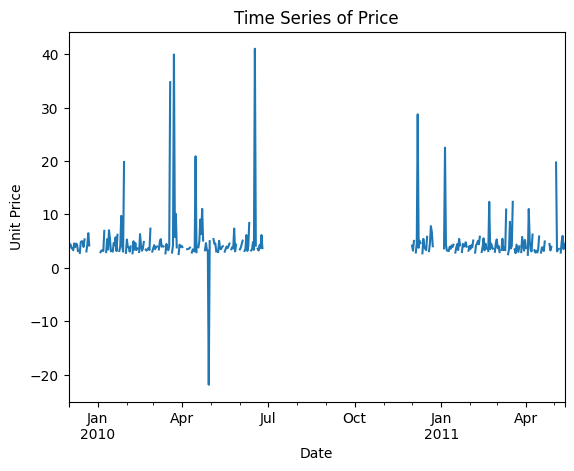

In [12]:
# Check the column names
print(df.columns)

# Clean up the column names by stripping any leading or trailing whitespace
df.columns = df.columns.str.strip()

# Now try converting 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Set InvoiceDate as the index and resample by day
df.set_index('InvoiceDate', inplace=True)

# Plot the time series of UnitPrice
df['Price'].resample('D').mean().plot()

plt.title('Time Series of Price')
plt.ylabel('Unit Price')
plt.xlabel('Date')
plt.show()


In [29]:
print(df.columns)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

df_filtered_2011 = df[(df['Quantity'] < 1000) & (pd.DatetimeIndex(df['Date Attribute']).year == 2011)]

# Resample the filtered data by day and plot the average price
price_2011_filtered = df_filtered_2011['Price'].resample('D').mean()

# Plotting the time series of average price
price_2011_filtered.plot(figsize=(10, 6))
plt.title("Price Over Time for Transactions with Quantity < 1000 in 2011")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.show()

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer ID', 'Country', 'TotalAmount'],
      dtype='object')


KeyError: 'InvoiceDate'

In [14]:
# Calculate the total amount (Quantity * UnitPrice) for each product description
df['TotalAmount'] = df['Quantity'] * df['Price']

# Create a pivot table to show total amount by product description
pivot_table = pd.pivot_table(df, values='TotalAmount', index='Description', aggfunc=np.sum)

# Sort the pivot table by TotalAmount in descending order
pivot_table_sorted = pivot_table.sort_values(by='TotalAmount', ascending=False)
print(pivot_table_sorted.head())


                                    TotalAmount
Description                                    
DOTCOM POSTAGE                        134128.43
WHITE HANGING HEART T-LIGHT HOLDER    130778.09
REGENCY CAKESTAND 3 TIER              129622.53
PARTY BUNTING                          67155.54
ASSORTED COLOUR BIRD ORNAMENT          49346.85


C:\Users\PranitaAnnaldas\AppData\Local\Temp\ipykernel_11356\1743974967.py:5: FutureWarning: The provided callable <function sum at 0x000001EE5EC94AE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(df, values='TotalAmount', index='Description', aggfunc=np.sum)


In [15]:
# Group by country and product description to find the highest unit price
highest_price_info = df.groupby(['Country', 'Description'])['Price'].max()

# Find the country and product with the highest price
highest_price_info_sorted = highest_price_info.sort_values(ascending=False).head(1)
print(highest_price_info_sorted)


Country         Description
United Kingdom  Manual         25111.09
Name: Price, dtype: float64


In [32]:
# Filter data for transactions in 2010
df_2010 = df[pd.DatetimeIndex(df['InvoiceDate']).year == 2010]

# Get the top 10 products with the minimum unit price
top_10_min_price_2010 = df_2010.groupby('Description')['Price'].min().nsmallest(10)
print(top_10_min_price_2010)


KeyError: 'InvoiceDate'

In [17]:
import re

In [18]:
data = {
    "Company Name": ["ABC Inc.", "XYZ Corporation", "Tech Solutions Ltd.", "Global Services LLC", "Innovative Ventures"],
    "Description": [
        "Contact us at info@abcinc.com for more information.",
        "For inquiries, email us at contact@xyzcorp.com.",
        "Tech Solutions Ltd. provides support via support@techsolutions.com.",
        "Reach out to us at info@globalservicesllc.net for business inquiries.",
        "Email us at hello@innovativeventures.org for partnership opportunities."
    ]
}

In [19]:
# Create DataFrame
df1 = pd.DataFrame(data)

In [20]:
def extract_email(text):
    # Regular expression to match emails
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    emails = re.findall(email_pattern, text)
    return emails[0] if emails else None 

In [21]:
# Apply the function to the 'Description' column
df1['Email'] = df1['Description'].apply(extract_email)

In [22]:
# Display the DataFrame with extracted emails
print(df1)

          Company Name                                        Description  \
0             ABC Inc.  Contact us at info@abcinc.com for more informa...   
1      XYZ Corporation    For inquiries, email us at contact@xyzcorp.com.   
2  Tech Solutions Ltd.  Tech Solutions Ltd. provides support via suppo...   
3  Global Services LLC  Reach out to us at info@globalservicesllc.net ...   
4  Innovative Ventures  Email us at hello@innovativeventures.org for p...   

                          Email  
0               info@abcinc.com  
1           contact@xyzcorp.com  
2     support@techsolutions.com  
3    info@globalservicesllc.net  
4  hello@innovativeventures.org  


In [25]:
# Function to count word frequencies
def word_frequency(text):
    # Convert text to lowercase for case-insensitive matching
    text = text.lower()
    
    # Regex pattern to match words (letters and numbers)
    words = re.findall(r'\b\w+\b', text)
    
    
    # Create a dictionary to store the frequency of each word
    frequency = {}
    
    # Count frequency of each word
    for word in words:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
        
    return frequency

In [26]:

text = input("Enter a text: ")

word_freq = word_frequency(text)
print(word_freq)

{'hello': 2, 'world': 1, 'python': 2, 'is': 1, 'a': 1, 'programming': 1, 'language': 1}
